In [10]:
import numpy as np
import matplotlib.pyplot as plt
from Dirac_Exciton import Dirac_FXC
from ase.units import *
from scipy.optimize import curve_fit

from tqdm import tqdm
%matplotlib inline

In [11]:
a=3.193 # lattice parameter
t=1.10  # effective hopping parameter
delta=1.66/2  # gap
epsilon=1 # substrate dielectric contant
r0=33.875 # screening length

In [12]:
dirac=Dirac_Exciton(params=(a,t,delta,r0,1))
dirac.exciton_hamiltonian(N=30)
dirac.susceptibility_zero()

In [31]:
alpha=np.linspace(0.01,10,40)
epsilon=4.075/alpha
fxc=[]
for e in epsilon:
    dirac=Dirac_Exciton(params=(a,t,delta,r0,e))
    dirac.exciton_hamiltonian(N=30)
    dirac.susceptibility_zero()
    fxc.append(dirac.fxc)
    print(dirac.alpha,fxc[-1]/dirac.delta)
fxc=np.array(fxc)/dirac.delta

fxc_corr=[]
for e in epsilon:
    dirac=Dirac_Exciton(params=(a,t,delta,r0/e,e))
    dirac.exciton_hamiltonian(N=30)
    dirac.susceptibility_zero()
    fxc_corr.append(dirac.fxc)
    print(dirac.alpha,fxc_corr[-1]/dirac.delta)
fxc_corr=np.array(fxc_corr)/dirac.delta

0.010060801472232324 (-0.03482438083101169+0j)
0.26777210072249114 (-0.9305467675310469+0j)
0.5254833999727498 (-1.83363633290097+0j)
0.7831946992230086 (-2.74453107394057+0j)
1.0409059984732674 (-3.663708825021809+0j)
1.2986172977235262 (-4.591692165632294+0j)
1.556328596973785 (-5.529054096295517+0j)
1.8140398962240436 (-6.476424629553247+0j)
2.0717511954743024 (-7.4344984763015844+0j)
2.329462494724561 (-8.404044050056989+0j)
2.5871737939748196 (-9.385914065592653+0j)
2.8448850932250784 (-10.381058077483903+0j)
3.1025963924753373 (-11.390537393409263+0j)
3.360307691725596 (-12.415542913374603+0j)
3.6180189909758553 (-13.457416598821256+0j)
3.8757302902261137 (-14.51767747803499+0j)
4.133441589476372 (-15.598053365106091+0j)
4.391152888726631 (-16.7005198356343+0j)
4.64886418797689 (-17.827348502200902+0j)
4.906575487227149 (-18.981167323251363+0j)
5.164286786477407 (-20.165036645218425+0j)
5.421998085727666 (-21.382546047672093+0j)
5.679709384977926 (-22.637939032131644+0j)
5.937420

In [32]:
linear=lambda x,a:a*x
popt,pcov=curve_fit(linear,alpha[alpha<4],fxc[alpha<4])

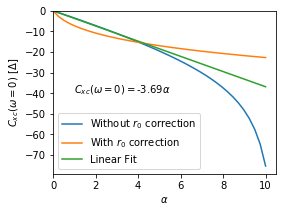

In [34]:
plt.figure(figsize=(4,3))
plt.plot(alpha,fxc,'-',label='Without $r_0$ correction')
plt.plot(alpha,fxc_corr,'-',label='With $r_0$ correction')
plt.plot(alpha,linear(alpha,*popt),'-',label='Linear Fit')
plt.xlabel(r'$\alpha$')
plt.ylabel(r'$C_{xc}(\omega=0)$ [$\Delta$]')
plt.legend(loc='best')
plt.text(1,-40,r'$C_{xc}(\omega=0)=$'+str(np.round(popt[0],2))+r'$\alpha $')
plt.xlim([0,None])
plt.ylim([None,0])
plt.savefig('xc.png',dpi=600)